In [116]:
#Financial Stress Testing Project on commodity
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import seaborn as sns
import time


In [117]:
#Symbols
#I decided to take the most liquid commodities, and the ones which represent the best the BCOM or Goldman Sachs Commodity Index. 
#BCOM : Energy: 26.64%
#        Precious Metals: 21.86%
#        Industrial Metals: 14.74%
#        Agriculture: 30.98%
#        Livestock: 5.78%
#GSCI: Energy: 54%
#      Grains: 15%
#      Livestock: 8%
#      Precious Metals: 7%
#      Industrial Metals: 12%
#      Softs: 4%


In [118]:
'''
    CL1 Comdty = Crude Oil WTI NYM -> Energy
    CO1 Comdty = Crude Oil Brent -> Energy 
    NG1 Comdty = Nat Gas NYM -> Energy
    XB1 Comdty = Gasoline Future -> Energy
    HO1 Comdty = Heating Oil -> Energy
    GC1 = Gold COMEX -> Precious Metals
    SI1 Comdty = Silver COMEX -> Precious Metals
    PL1 Comdty = Platinium NYM -> Precious Metals
    HG1 Comdty = Copper COMEX -> Industrial Metal
    C 1 Comdty = Corn -> Agriculture (Grains)
    S 1 Comdty = Soybeans -> Agriculture (Grains)
    W 1 Comdty = Wheat -> Agriculture (Grains)
    KC1 Comdty = Coffee -> Agriculture (Softs)
    SB1 Comdty = Sugar -> Agriculture (Softs)
    CT1 Comdty = Cotton -> Agriculture (Softs)
    LC1 Comdty = Live Cattle -> Livestock
    LH1 Comdty  = Lean hogs -> Livestock
'''

file_path = "/Users/kilian_1/Library/CloudStorage/OneDrive-City,UniversityofLondon/Desktop/Programming VSC/Commodity_Stress_Test_Project/BLOOM_DATA_STRESS_TEST_COMMO.xlsx"
df = pd.read_excel(file_path, header=0)

# Rename the first column to 'Date' and set it as datetime index
df.rename(columns={df.columns[0]: "Date"}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Convert all other columns to numeric 
df = df.apply(pd.to_numeric, errors='coerce')

returns = df.pct_change().dropna()

print(returns.head(5))


            CL1 Comdty  CO1 Comdty  NG1 Comdty  XB1 Comdty  HO1 Comdty  \
Date                                                                     
2005-11-30   -0.040830   -0.052496    0.031299   -0.034153   -0.086676   
2005-12-30    0.064899    0.071390   -0.108207    0.139415    0.069042   
2006-01-31    0.112713    0.118854   -0.170067    0.009080    0.042766   
2006-02-28   -0.095848   -0.064101   -0.279304   -0.120458   -0.049892   
2006-03-31    0.085002    0.067196    0.073875    0.336852    0.087500   

            GC1 Comdty  SI1 Comdty  PL1 Comdty  HG1 Comdty  C 1 Comdty  \
Date                                                                     
2005-11-30    0.059327    0.092348    0.039440    0.145776   -0.044586   
2005-12-30    0.049131    0.073671   -0.007548   -0.015904    0.150667   
2006-01-31    0.100019    0.111924    0.115416    0.091332    0.013905   
2006-02-28   -0.012088   -0.016692   -0.028195   -0.019295    0.042286   
2006-03-31    0.031743    0.185185   

In [119]:
#Now we are going to estimate the potential risk of the PF (VaR and CVaR) using the historical simulation method. The PF is an equally wheigted PF of the commodities.

#NON-EQUALLY WEIGHTED PF
'''Energy (40.3%) — 5 assets
    CL1 (WTI Crude): 10.0%
    CO1 (Brent Crude): 10.0%
    NG1 (Nat Gas): 8.0%
    XB1 (Gasoline): 6.2%
    HO1 (Heating Oil): 6.1%
Precious Metals (14.4%) — 3 assets
    GC1 (Gold): 6.0%
    SI1 (Silver): 5.0%
    PL1 (Platinum): 3.4%
Industrial Metals (13.4%) — 1 asset
    HG1 (Copper): 13.4%
Agriculture (25.0%) — 6 assets (3 grains, 3 softs)
- Grains (13%)
    C 1 (Corn): 4.3%
    S 1 (Soybeans): 4.3%
    W 1 (Wheat): 4.4%
- Softs (12%)
    KC1 (Coffee): 4.0%
    SB1 (Sugar): 4.0%
    CT1 (Cotton): 4.0%
- Livestock (6.9%) — 2 assets
    LC1 (Live Cattle): 3.45%
    LH1 (Lean Hogs): 3.45%'''

row_vector = np.array([0.1, 0.1, 0.08, 0.062, 0.061, 0.06, 0.05, 0.034, 0.134, 0.043, 0.043, 0.044, 0.04, 0.04, 0.04, 0.0345, 0.0345])
column_vector = row_vector.T
portfolio_returns = (returns @ column_vector)
portfolio_returns = pd.Series(portfolio_returns, index=returns.index, name='Portfolio Return')


#EQUALLY WEIGHTED PF
'''portfolio_returns = returns.mean(axis = 1) #Tells pandas to average across columns, i.e., for each row (time point), take the mean of all asset returns.
print(portfolio_returns.head(5))'''
print()
#Risk Metrics

vol = portfolio_returns.std()
print("Volatility: ", vol)
print()

sharpe = portfolio_returns.mean() / vol
print("Sharpe Ratio: ", sharpe)
print()

#Soretino Ration (r_p - r_f) / std_d 
#Where std_d is the standard deviation of the drawdowns (<0)
sortino_ratio = portfolio_returns.mean() / portfolio_returns[ portfolio_returns < 0 ].std()
print("Sortino Ratio: ", sortino_ratio)
print()

cumulative_returns = (1+portfolio_returns).cumprod() 
print("Cumulative Returns: ", cumulative_returns.head(2))
print()


roll_max = cumulative_returns.cummax()
print("Rolling Max: ", roll_max)
print()

drawdown = (cumulative_returns - roll_max) / (roll_max)
print(drawdown.head(10))
print()

#VaR and CVaR (VaR is in negative terms) (CVaR is expected average loss in the worst case tail beyond the VaR threshold)
VaR_95 = float(np.percentile(portfolio_returns, 5))
print(f"VaR 95%: {VaR_95:.2%}")
print()

#CVaR
CVaR_95 = float(portfolio_returns[portfolio_returns <= VaR_95].mean())
print(f"CVaR 95%: {CVaR_95:.2%}")




Volatility:  0.05366029892659875

Sharpe Ratio:  0.12526174654159947

Sortino Ratio:  0.17158159276543236

Cumulative Returns:  Date
2005-11-30    1.013280
2005-12-30    1.069595
Name: Portfolio Return, dtype: float64

Rolling Max:  Date
2005-11-30    1.013280
2005-12-30    1.069595
2006-01-31    1.124041
2006-02-28    1.124041
2006-03-31    1.135659
2006-04-28    1.238776
2006-05-31    1.245866
2006-06-30    1.245866
2006-07-31    1.285287
2006-08-31    1.285287
2006-09-29    1.285287
2006-10-31    1.285287
2006-11-30    1.285287
2006-12-29    1.285287
2007-01-31    1.285287
2007-02-28    1.285287
2007-03-30    1.303452
2007-04-30    1.341258
2007-05-31    1.342792
2007-06-29    1.353998
2007-07-31    1.406649
2007-08-31    1.406649
2007-09-28    1.491516
2007-10-31    1.575071
2007-11-30    1.575071
2007-12-31    1.619416
2008-01-31    1.678139
2008-02-29    1.895461
2008-03-31    1.895461
2008-04-30    1.904141
2008-05-30    1.990750
2008-06-30    2.168416
2008-07-31    2.168416
20

[0.01517697 0.01532658 0.01547785 0.01563081 0.01578548]
[0.00021533 0.00022342 0.0002318  0.00024049 0.00024948]


Text(0.5, 1.0, 'Return Distribution: Normal vs. t-Distribution')

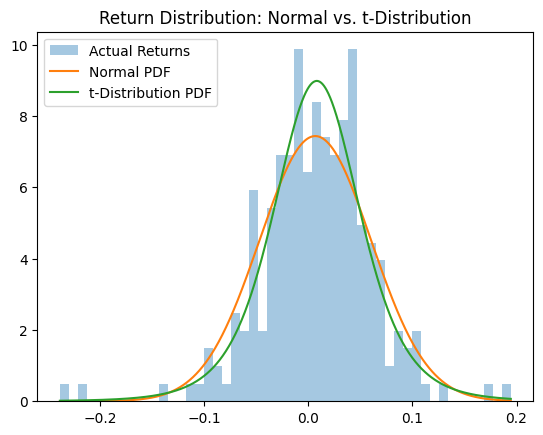

In [120]:
#Now we are going to do a Scenario & Stress Testing + Fat Tails Modelling

from scipy.stats import t, norm

#---------------------------------Fat Tail Modelling--------------------------------
#Fat tails are a phenomenon where extreme events (like large losses or gains) are more likely than what a normal distribution would predict.
#Fit a t-distribution to the returns
params = t.fit(portfolio_returns) #	Output is a Tuple: (Degrees of freedom (controls tail thickness), Location parameter (like mean), Scale parameter (like standard deviation))
#print("Parameters: ", params)

#Create the range oif x values
x = np.linspace(portfolio_returns.min(), portfolio_returns.max(), 1000) #This line creates 1,000 evenly spaced values between the minimum and maximum of portfolio_returns

#Generate the probability densitiy function (PDF) for the t-distribution
#t.pdf -> This evaluates the probability density function (PDF) of the Student’s t-distribution at each value in x.
# A PDF tells you how likely it is to observe a value in a continuous distribution, like the Student’s t-distribution.
#High PDF values -> return values that are more likely
#Low PDF values -> return values that are less likely


#The *params unpacks the tuple into the function arguments. pdf: PDF of Student’s t-distribution (fat-tailed)
#pdf_norm: PDF of Normal distribution (thin-tailed)
pdf = t.pdf(x, *params) 
pdf_norm = norm.pdf(x, loc = portfolio_returns.mean(), scale = portfolio_returns.std()) 

print(pdf[:5])
print(pdf_norm[:5])

plt.hist(portfolio_returns, bins=50, density=True, alpha=0.4, label="Actual Returns")
plt.plot(x, pdf_norm, label="Normal PDF")
plt.plot(x, pdf, label="t-Distribution PDF")
plt.legend()
plt.title("Return Distribution: Normal vs. t-Distribution")










In [121]:
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform
#---------------------------------Correlation Analysis--------------------------------
corr = returns.corr()

dist = 1- corr #Converts correlations into distances.

#The distance is 1 - correlation, so that a higher correlation means a smaller distance.
link = linkage(squareform(dist), method='ward') #This does hierarchical clustering using the Ward linkage method: squareform(dist) converts the matrix to a 1D condensed form (needed by linkage).
                                                #linkage(..., method='ward') builds a tree (dendrogram) showing how assets cluster based on similarity.

ordered = corr.columns[leaves_list(link)].to_list()
reordered_corr = corr.loc[ordered, ordered]
print(reordered_corr)

            XB1 Comdty  HO1 Comdty  CL1 Comdty  CO1 Comdty  LC1 Comdty  \
XB1 Comdty    1.000000    0.679461    0.744517    0.803300    0.023354   
HO1 Comdty    0.679461    1.000000    0.778202    0.830051    0.145567   
CL1 Comdty    0.744517    0.778202    1.000000    0.917093    0.215056   
CO1 Comdty    0.803300    0.830051    0.917093    1.000000    0.175873   
LC1 Comdty    0.023354    0.145567    0.215056    0.175873    1.000000   
LH1 Comdty    0.216650    0.112298    0.177470    0.218637    0.155236   
HG1 Comdty    0.449020    0.391999    0.416006    0.468482    0.086347   
PL1 Comdty    0.401485    0.291068    0.384700    0.431253    0.109995   
GC1 Comdty    0.166405    0.099084    0.109296    0.153094   -0.027936   
SI1 Comdty    0.329321    0.248448    0.327878    0.342486    0.026752   
W 1 Comdty    0.038281    0.112758    0.060029    0.081671   -0.058322   
C 1 Comdty    0.143594    0.252273    0.187319    0.206823   -0.055488   
S 1 Comdty    0.242775    0.300165    

In [122]:
import plotly.figure_factory as ff
import plotly.io as pio
#Plot the heatmap
#I don't know why, but I can't plot the heatmap directly on the notebook. The only option working is to to use pio.renderers.default = 'browser' and plot it in the browser. --> Check !
pio.renderers.default = 'browser' #Set the default renderer to open in a web browser

fig = ff.create_annotated_heatmap( z= reordered_corr.values.round(2),
                                   x = reordered_corr.columns.tolist(),
                                   y = reordered_corr.index.tolist(),
                                   colorscale = 'Viridis',
                                   zmin = -1,
                                   zmax = 1,
                                   showscale= True,
)
fig.update_layout(title_text='Correlation Heatmap', title_x=0.5, template='plotly_dark', height=800, width=1100)
fig.show()

In [123]:
#--------------------------------Stress Testing--------------------------------
#Stress Testing is a simulation technique used to evaluate how a portfolio would perform under extreme market conditions.
shock = 0.1 #10% shock (10% drop here)
stress_returns = portfolio_returns - shock
print(stress_returns.head(5))

VaR_95_stress = np.percentile(stress_returns, 5)
CVaR_95_stress = portfolio_returns[portfolio_returns <= VaR_95_stress].mean()


print(f"VaR 95% Stress: {VaR_95_stress:.2%}")
print(f"CVaR 95% Stress: {CVaR_95_stress:.2%}")

Date
2005-11-30   -0.086720
2005-12-30   -0.044424
2006-01-31   -0.049096
2006-02-28   -0.152342
2006-03-31   -0.033861
Name: Portfolio Return, dtype: float64
VaR 95% Stress: -17.38%
CVaR 95% Stress: -22.87%


In [124]:

#------------------------ Factor Based Shock Simulation ---------------------------
#Hypothetical shocks
#Shocks are homogeneous troughout time for all commodities
shocks = {"CL1 Comdty": 0.1,  # Crude Oil (WTI)
    "CO1 Comdty": 0.08,  # Crude Oil (Brent)
    "NG1 Comdty": 0.05,  # Natural Gas
    "XB1 Comdty": 0.02,  # RBOB Gasoline
    "HO1 Comdty": -0.08,  # Heating Oil
    "GC1 Comdty": 0.05,  # Gold
    "SI1 Comdty": 0.01,  # Silver
    "PL1 Comdty": -0.11,  # Platinum
    "HG1 Comdty": 0.04,  # Copper
    "C 1 Comdty": -0.05,  # Corn
    "S 1 Comdty": 0.02,  # Soybeans
    "W 1 Comdty": -0.01,  # Wheat
    "KC1 Comdty": -0.10,  # Coffee
    "SB1 Comdty": -0.05,  # Sugar
    "CT1 Comdty": -0.07,  # Cotton
    "CC1 Comdty": -0.06,  # Cocoa
    "LC1 Comdty": 0.02,  # Live Cattle
    "LH1 Comdty": -0.08   # Lean Hogs
}



stress_returns_2 = returns.copy()

for asset, shock in shocks.items():
    if asset in stress_returns_2.columns:
        stress_returns_2[asset] = stress_returns_2[asset] + shock


stressed_portoflio = stress_returns_2 @ column_vector
print(stressed_portoflio.head(5))
print()

VaR_95_shocked_2 = np.percentile(stressed_portoflio, 5)
CVaR_95_shocked_2 = stressed_portoflio[stressed_portoflio <= VaR_95_shocked_2].mean()

print(f"VaR 95% Shocked: {VaR_95_shocked_2:.2%}")
print(f"CVaR 95% Shocked: {CVaR_95_shocked_2:.2%}")

Date
2005-11-30    0.024160
2005-12-30    0.066456
2006-01-31    0.061784
2006-02-28   -0.041462
2006-03-31    0.077019
dtype: float64

VaR 95% Shocked: -6.29%
CVaR 95% Shocked: -10.82%


Global Financial Crisis	    2008-07	2009-03	    Energy, Metals, Ag
COVID-19 Crash	            2020-02	2020-04	    Energy, Ag
Trump Tariffs	            2018-03	2019-01	    Grains, Industrial Metals
2011 Euro Debt Crisis	    2011-06	2011-12	    Precious Metals, Energy
2022 Ukraine War	        2022-02	2022-06	    Energy, Grains

In [ ]:
def event_analysis(event_start, event_end, name_crisis):
    crisis_returns = returns.loc[event_start: event_end]
    #Each asset analysis
    cumulative_returns = (1 + crisis_returns).prod() - 1
    print((cumulative_returns * 100).round(4).astype(str) + '%')
    print()

    print(f"Commodity that had the bests cumulative returns during this event: {cumulative_returns.idxmax()} --> {cumulative_returns.max():.2%}")
    print(f"Commodity that had the worsts cumulative returns during this event: {cumulative_returns.idxmin()} --> {cumulative_returns.min():.2%}")
    print()

    #Portfolio analysis
    portfolio_returns_event = float((1 + crisis_returns @ column_vector).prod() - 1)
    print(f"Overall, the portfolio made a performance of: {portfolio_returns_event:.2%} during the event")
    print()

    #Drawdown for each commodities
    prices = (1 + crisis_returns).cumprod()
    rolling_max = prices.cummax()
    drawdown_crisis = (prices - rolling_max) / rolling_max
    max_drawdown_crisis = drawdown_crisis.min()
    print((max_drawdown_crisis * 100).round(4).astype(str) + '%')
    print()

    #Biggest Drawdown of the portfolio
    portfolio_prices = (1 + crisis_returns @ row_vector.T).cumprod()
    portfolio_drawdown = (portfolio_prices - portfolio_prices.cummax()) / portfolio_prices.cummax()
    max_portfolio_drawdown = portfolio_drawdown.min()
    print(f"Biggest drawback for the portfolio during event :{max_portfolio_drawdown:.2%}")
    print()

    #VaR comparasion (alpha = 5%)
    print(f"{VaR_95:.2%}")
    print(portfolio_returns_event / abs(VaR_95))


    
    labels = [name_crisis, "VaR 95"]
    values = [float(portfolio_returns_event), float(VaR_95)]
    plt.bar(labels, values, color=['red', 'gray'])
    plt.ylabel("Return")
    plt.axhline(0, color='black', linewidth=0.8)
    plt.show()








CL1 Comdty    -64.5286%
CO1 Comdty     -64.793%
NG1 Comdty    -71.7217%
XB1 Comdty    -60.0171%
HO1 Comdty    -65.5692%
GC1 Comdty      -0.614%
SI1 Comdty    -25.4592%
PL1 Comdty     -45.842%
HG1 Comdty    -52.6505%
C 1 Comdty    -44.1532%
S 1 Comdty    -40.6854%
W 1 Comdty    -36.8405%
KC1 Comdty    -23.2936%
SB1 Comdty      5.2326%
CT1 Comdty     -34.916%
LC1 Comdty    -16.5755%
LH1 Comdty    -15.9178%
dtype: object

Commodity that had the bests cumulative returns during this event: SB1 Comdty --> 5.23%
Commodity that had the worsts cumulative returns during this event: NG1 Comdty --> -71.72%

Overall, the portfolio made a performance of: -46.51% during the event

CL1 Comdty    -66.4088%
CO1 Comdty    -63.2279%
NG1 Comdty     -58.592%
XB1 Comdty    -66.9226%
HO1 Comdty    -63.1867%
GC1 Comdty    -21.4137%
SI1 Comdty    -45.3064%
PL1 Comdty     -52.801%
HG1 Comdty    -61.4912%
C 1 Comdty    -40.5106%
S 1 Comdty    -37.3455%
W 1 Comdty    -34.8644%
KC1 Comdty    -22.8682%
SB1 Comdty   

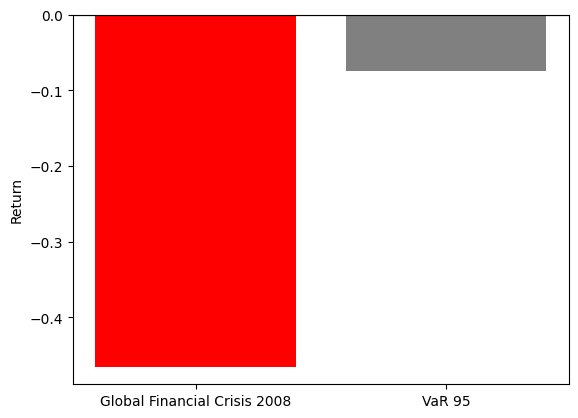

In [ ]:
#--------------------------------------------Global Financial Crisis--------------------------------------------

event_analysis("2008-07", "2009-03", "Global Financial Crisis 2008")

CL1 Comdty      -63.46%
CO1 Comdty    -56.5509%
NG1 Comdty      5.8664%
XB1 Comdty    -53.1269%
HO1 Comdty    -54.9461%
GC1 Comdty      7.0314%
SI1 Comdty    -17.2885%
PL1 Comdty    -15.4798%
HG1 Comdty      -6.476%
C 1 Comdty    -18.2951%
S 1 Comdty     -2.5501%
W 1 Comdty     -4.3341%
KC1 Comdty      1.9484%
SB1 Comdty    -28.8843%
CT1 Comdty    -13.9852%
LC1 Comdty    -25.8496%
LH1 Comdty      3.5011%
dtype: object

Commodity that had the bests cumulative returns during this event: GC1 Comdty --> 7.03%
Commodity that had the worsts cumulative returns during this event: CL1 Comdty --> -63.46%

Overall, the portfolio made a performance of: -24.08% during the event

CL1 Comdty    -57.9088%
CO1 Comdty    -54.9881%
NG1 Comdty     -2.6128%
XB1 Comdty    -58.9251%
HO1 Comdty     -50.899%
GC1 Comdty         0.0%
SI1 Comdty    -13.6145%
PL1 Comdty    -16.2253%
HG1 Comdty    -12.4902%
C 1 Comdty    -15.0068%
S 1 Comdty      -4.035%
W 1 Comdty     -6.8571%
KC1 Comdty    -12.4634%
SB1 Comdty   

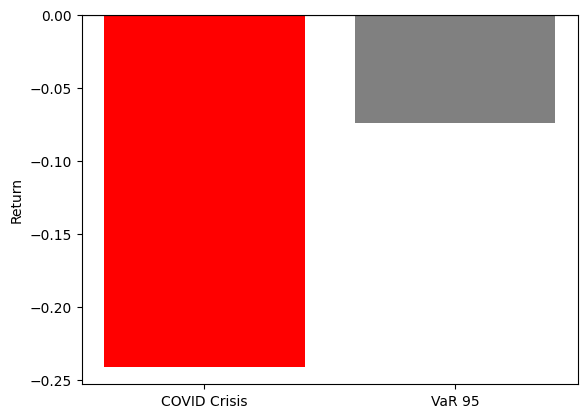

In [136]:
#--------------------------------------------COVID Crisis--------------------------------------------

start_covid = "2020-02"
end_covid = "2020-04"
name_covid = "COVID Crisis"
event_analysis(start_covid, end_covid, name_covid)

CL1 Comdty    -12.7352%
CO1 Comdty     -5.9137%
NG1 Comdty      5.5118%
XB1 Comdty    -22.4725%
HO1 Comdty     -1.8186%
GC1 Comdty      0.1366%
SI1 Comdty     -1.5437%
PL1 Comdty    -16.5368%
HG1 Comdty    -10.3942%
C 1 Comdty       0.534%
S 1 Comdty    -12.4163%
W 1 Comdty      6.6047%
KC1 Comdty    -12.5155%
SB1 Comdty     -5.5638%
CT1 Comdty     -8.8794%
LC1 Comdty     -2.1176%
LH1 Comdty    -16.3258%
dtype: object

Commodity that had the bests cumulative returns during this event: W 1 Comdty --> 6.60%
Commodity that had the worsts cumulative returns during this event: XB1 Comdty --> -22.47%

Overall, the portfolio made a performance of: -3.45% during the event

CL1 Comdty    -38.7593%
CO1 Comdty    -34.9613%
NG1 Comdty    -38.9853%
XB1 Comdty    -39.2547%
HO1 Comdty    -28.5313%
GC1 Comdty    -11.2212%
SI1 Comdty    -15.4631%
PL1 Comdty    -15.4292%
HG1 Comdty    -14.1599%
C 1 Comdty    -11.1041%
S 1 Comdty    -19.7302%
W 1 Comdty     -9.6163%
KC1 Comdty    -20.6952%
SB1 Comdty    

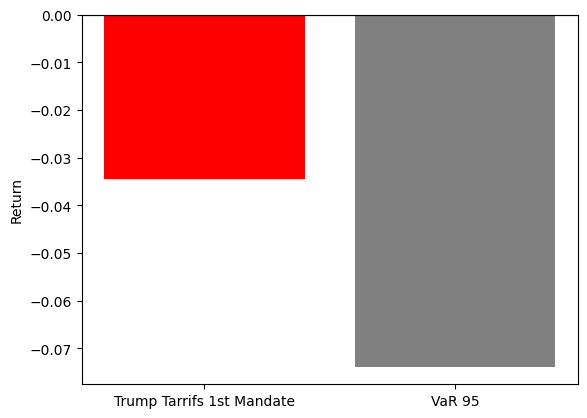

In [137]:
#--------------------------------------------Trump Tariffs 1st Mandate--------------------------------------------
trump_tarrif_1_start = "2018-03"
trump_tarrif_1_end = "2019-01"
name_tarrif_1 = "Trump Tarrifs 1st Mandate"
event_analysis(trump_tarrif_1_start, trump_tarrif_1_end, name_tarrif_1)

CL1 Comdty     -3.7683%
CO1 Comdty     -8.0099%
NG1 Comdty    -35.9408%
XB1 Comdty    -14.7315%
HO1 Comdty     -3.9689%
GC1 Comdty      2.0118%
SI1 Comdty    -27.1244%
PL1 Comdty    -23.6805%
HG1 Comdty    -17.7499%
C 1 Comdty    -13.5117%
S 1 Comdty    -12.8997%
W 1 Comdty    -16.5548%
KC1 Comdty    -14.2668%
SB1 Comdty      0.5177%
CT1 Comdty    -42.1441%
LC1 Comdty     18.4578%
LH1 Comdty     -6.5151%
dtype: object

Commodity that had the bests cumulative returns during this event: LC1 Comdty --> 18.46%
Commodity that had the worsts cumulative returns during this event: CT1 Comdty --> -42.14%

Overall, the portfolio made a performance of: -12.35% during the event

CL1 Comdty    -17.2414%
CO1 Comdty    -11.9753%
NG1 Comdty    -31.6644%
XB1 Comdty    -17.5142%
HO1 Comdty     -9.7345%
GC1 Comdty    -14.3498%
SI1 Comdty    -33.0559%
PL1 Comdty    -24.5933%
HG1 Comdty     -29.635%
C 1 Comdty    -21.7822%
S 1 Comdty    -21.9289%
W 1 Comdty    -20.0604%
KC1 Comdty    -21.5323%
SB1 Comdty  

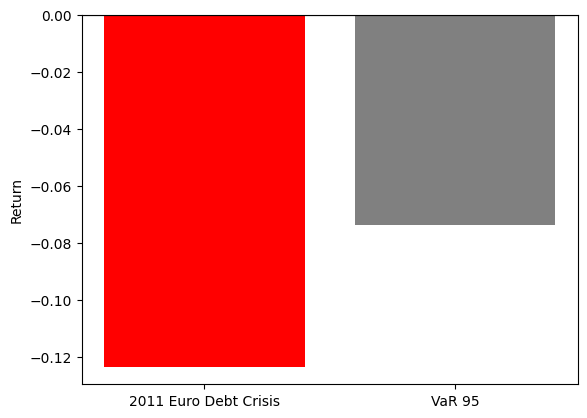

In [138]:
#--------------------------------------------2011 Euro Debt Crisis--------------------------------------------
eu_debt_crisis_start =  "2011-06"
eu_debt_crisis_end = "2011-12"
eu_name = "2011 Euro Debt Crisis"
event_analysis(eu_debt_crisis_start, eu_debt_crisis_end, eu_name)

CL1 Comdty     19.9773%
CO1 Comdty     25.8744%
NG1 Comdty     11.2844%
XB1 Comdty     42.8885%
HO1 Comdty     41.2801%
GC1 Comdty      0.6852%
SI1 Comdty     -9.4271%
PL1 Comdty    -11.9906%
HG1 Comdty    -14.1057%
C 1 Comdty     18.8099%
S 1 Comdty     12.3784%
W 1 Comdty     14.1215%
KC1 Comdty      -0.638%
SB1 Comdty       3.348%
CT1 Comdty    -18.5232%
LC1 Comdty     -1.1284%
LH1 Comdty     23.3399%
dtype: object

Commodity that had the bests cumulative returns during this event: XB1 Comdty --> 42.89%
Commodity that had the worsts cumulative returns during this event: CT1 Comdty --> -18.52%

Overall, the portfolio made a performance of: 10.80% during the event

CL1 Comdty     -7.7701%
CO1 Comdty      -6.537%
NG1 Comdty     -33.407%
XB1 Comdty    -10.5529%
HO1 Comdty    -18.4767%
GC1 Comdty     -7.2799%
SI1 Comdty    -19.3013%
PL1 Comdty    -13.5073%
HG1 Comdty    -21.8165%
C 1 Comdty     -9.1048%
S 1 Comdty     -1.9464%
W 1 Comdty    -20.1149%
KC1 Comdty     -4.9947%
SB1 Comdty   

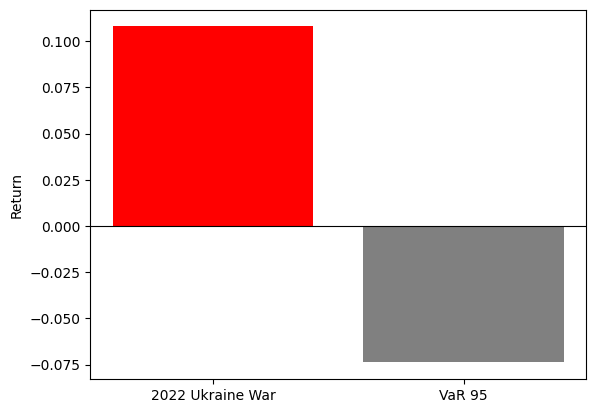

In [139]:
#-------------------------------------------2022 Ukraine War---------------------------------------------
ukraine_war_start = "2022-02"	
ukraine_war_end = "2022-06"
ukraine_name = "2022 Ukraine War"
event_analysis(ukraine_war_start, ukraine_war_end, ukraine_name)


CL1 Comdty    -15.9544%
CO1 Comdty    -13.7233%
NG1 Comdty     22.8666%
XB1 Comdty      1.6721%
HO1 Comdty     -8.2361%
GC1 Comdty     20.7253%
SI1 Comdty      -0.808%
PL1 Comdty     -3.0212%
HG1 Comdty      5.0691%
C 1 Comdty     13.7553%
S 1 Comdty      5.3181%
W 1 Comdty    -10.0789%
KC1 Comdty     68.1985%
SB1 Comdty     -23.219%
CT1 Comdty     -5.4621%
LC1 Comdty     11.7876%
LH1 Comdty      9.6957%
dtype: object

Commodity that had the bests cumulative returns during this event: KC1 Comdty --> 68.20%
Commodity that had the worsts cumulative returns during this event: SB1 Comdty --> -23.22%

Overall, the portfolio made a performance of: 3.20% during the event

CL1 Comdty    -19.7436%
CO1 Comdty    -17.7697%
NG1 Comdty    -19.2522%
XB1 Comdty    -10.7792%
HO1 Comdty    -18.0237%
GC1 Comdty     -0.6022%
SI1 Comdty     -6.0097%
PL1 Comdty     -10.137%
HG1 Comdty      -9.416%
C 1 Comdty     -5.9129%
S 1 Comdty     -2.9271%
W 1 Comdty      -8.311%
KC1 Comdty     -0.5907%
SB1 Comdty    

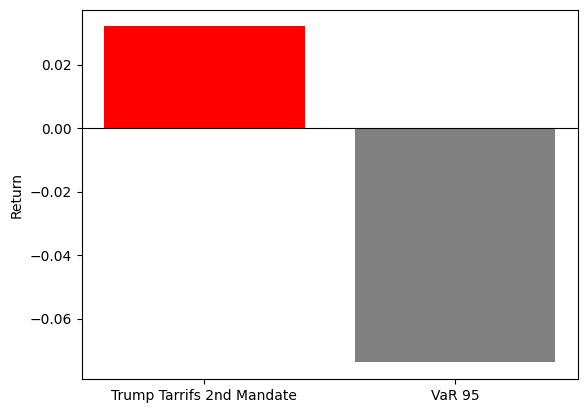

In [141]:
#-------------------------------------------Trump Tarrifs 2nd Mandate---------------------------------------------
trump_tarrifs_2_start = "2024-11"
trump_tarrifs_2_end = "2025-05"
name_tarrif_2 = "Trump Tarrifs 2nd Mandate"
event_analysis(trump_tarrifs_2_start, trump_tarrifs_2_end, name_tarrif_2)


In [ ]:
#Modelling

#Scenario 1 --> Energy Crash
#Scenario 2 --> Gold Surge
#Scenario 3 --> Ag Demand Shock


scenarios = pd.DataFrame({
    "Energy Crash": {
        "CL1 Comdty": -0.30,
        "CO1 Comdty": -0.25,
        "NG1 Comdty": -0.20,
        "XB1 Comdty": -0.20,
        "HO1 Comdty": -0.20,
        "GC1 Comdty": 0.00,
        "SI1 Comdty": 0.00,
        "PL1 Comdty": 0.00,
        "HG1 Comdty": 0.00,
        "C 1 Comdty": 0.00,
        "S 1 Comdty": 0.00,
        "W 1 Comdty": 0.00,
        "KC1 Comdty": 0.00,
        "SB1 Comdty": 0.00,
        "CT1 Comdty": 0.00,
        "LC1 Comdty": 0.00,
        "LH1 Comdty": 0.00
    },
    "Gold Surge": {
        "CL1 Comdty": 0.00,
        "CO1 Comdty": 0.00,
        "NG1 Comdty": 0.00,
        "XB1 Comdty": 0.00,
        "HO1 Comdty": 0.00,
        "GC1 Comdty": 0.15,
        "SI1 Comdty": 0.05,
        "PL1 Comdty": 0.07,
        "HG1 Comdty": 0.00,
        "C 1 Comdty": 0.00,
        "S 1 Comdty": 0.00,
        "W 1 Comdty": 0.00,
        "KC1 Comdty": 0.00,
        "SB1 Comdty": 0.00,
        "CT1 Comdty": 0.00,
        "LC1 Comdty": 0.00,
        "LH1 Comdty": 0.00
    },
    "Ag Demand Shock": {
        "CL1 Comdty": 0.00,
        "CO1 Comdty": 0.00,
        "NG1 Comdty": 0.00,
        "XB1 Comdty": 0.00,
        "HO1 Comdty": 0.00,
        "GC1 Comdty": 0.00,
        "SI1 Comdty": 0.00,
        "PL1 Comdty": 0.00,
        "HG1 Comdty": 0.00,
        "C 1 Comdty": -0.15,
        "S 1 Comdty": -0.10,
        "W 1 Comdty": -0.10,
        "KC1 Comdty": -0.05,
        "SB1 Comdty": -0.05,
        "CT1 Comdty": -0.05,
        "LC1 Comdty": 0.00,
        "LH1 Comdty": 0.00
    }
})


#weights = column_vector (see beginning of code)
weights = column_vector
print(weights)
print()


portfolio_scenario_returns = (scenarios.T @ weights)
print(portfolio_scenario_returns)
print()


[0.1    0.1    0.08   0.062  0.061  0.06   0.05   0.034  0.134  0.043
 0.043  0.044  0.04   0.04   0.04   0.0345 0.0345]

Energy Crash      -0.09560
Gold Surge         0.01388
Ag Demand Shock   -0.02115
dtype: float64



In [ ]:
#Risk Assessement Based on Goldman Sachs' Forecasts on commodity prices.
